## Dependecies

In [37]:
import pickle
import numpy as np
import keras
import tensorflow as tf
from keras.regularizers import l1, l2, l1_l2
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

## Loading needed data

In [3]:
ohe_train = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Customer Feedback Classification/absa/src/pickled files/OHE_X_train.pkl', 'rb'))
we_train = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Customer Feedback Classification/absa/src/pickled files/WE_X_train.pkl', 'rb'))
ytrain = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Customer Feedback Classification/absa/src/pickled files/y_train.pkl', 'rb'))
x_test = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Customer Feedback Classification/absa/src/pickled files/X_test.pkl', 'rb'))

## Validation data

In [4]:
x_train = we_train[:3000]
y_train = ytrain[:3000]
x_val = we_train[3000:]
y_val = ytrain[3000:]

## Building the Model

### Sequential

In [79]:
model = Sequential()

model.add(Embedding(input_dim=len(ytrain), output_dim=100,
                    input_length=28, trainable=True))
model.add(BatchNormalization())
model.add(LSTM(50, return_sequences=True, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(LSTM(50, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dense(3, activation='softmax'))

opt = optimizers.Adam(0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [80]:
n_epochs = 250
b_size = 70
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 28, 100)           400000    
                                                                 
 batch_normalization_9 (Batc  (None, 28, 100)          400       
 hNormalization)                                                 
                                                                 
 lstm_44 (LSTM)              (None, 28, 50)            30200     
                                                                 
 dropout_42 (Dropout)        (None, 28, 50)            0         
                                                                 
 lstm_45 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_43 (Dropout)        (None, 50)                0         
                                                     

In [ ]:
tf.keras.utils.plot_model(model)

In [81]:
train = model.fit(x_train, y_train,
                  epochs=n_epochs,
                  batch_size=b_size,
                  validation_data=(x_val, y_val), shuffle=True)

# val_loss, val_acc = model.evaluate(x_val, y_val)

# print('%.2f'%(val_loss * 100),'%', 'Validation Loss')
# print('%.2f'%(val_acc * 100),'%', 'Validation Accuracy')

Epoch 1/250
46/46 [==============================] - 8s 86ms/step - loss: 5.1067 - accuracy: 0.3853 - val_loss: 4.9726 - val_accuracy: 0.4280
Epoch 2/250
46/46 [==============================] - 3s 64ms/step - loss: 4.8456 - accuracy: 0.4206 - val_loss: 4.7302 - val_accuracy: 0.4280
Epoch 3/250
46/46 [==============================] - 3s 64ms/step - loss: 4.6007 - accuracy: 0.4331 - val_loss: 4.5066 - val_accuracy: 0.4330
Epoch 4/250
46/46 [==============================] - 3s 65ms/step - loss: 4.3796 - accuracy: 0.4412 - val_loss: 4.2996 - val_accuracy: 0.4370
Epoch 5/250
46/46 [==============================] - 3s 64ms/step - loss: 4.1631 - accuracy: 0.4556 - val_loss: 4.1078 - val_accuracy: 0.4460
Epoch 6/250
46/46 [==============================] - 3s 65ms/step - loss: 3.9328 - accuracy: 0.5022 - val_loss: 3.9188 - val_accuracy: 0.4570
Epoch 7/250
46/46 [==============================] - 3s 64ms/step - loss: 3.6692 - accuracy: 0.5838 - val_loss: 3.7057 - val_accuracy: 0.5050
Epoch 

#### Accuracy and Loss Visualization

Text(0, 0.5, 'Accuracy')

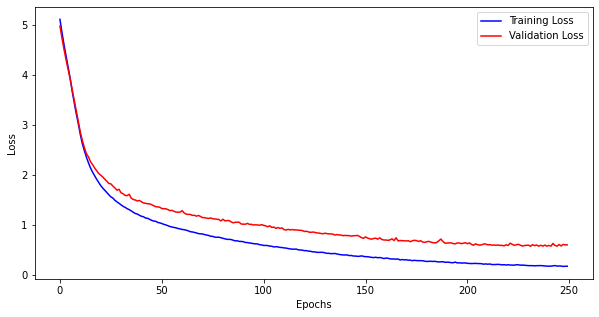

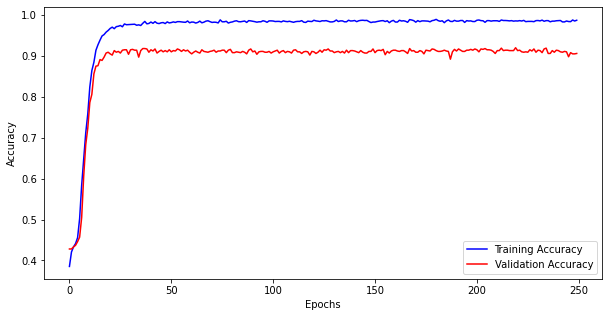

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(train.history['loss'], 'blue')
plt.plot(train.history['val_loss'], 'red')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(figsize=(10, 5))
plt.plot(train.history['accuracy'], 'blue')
plt.plot(train.history['val_accuracy'], 'red')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')